# Bike-Sharing Assignment 

### Objective:

We are modelling the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


## Step 1: Reading & Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Lets import bike sharing dataset

In [3]:
bikes_df = pd.read_csv('day.csv')

In [4]:
# lets check proper import
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


lets get the basic idea of bike sharing dataset

In [5]:
bikes_df.shape

(730, 16)

In [6]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can find info about above columns from data dictionary provided here: https://cdn.upgrad.com/uploads/production/0fdfa494-a9bf-4b32-873f-900e3b262948/Readme.txt

from above info we can see that there are few actions we need to take before proceeding to use the data. Lets move to data cleaning

## Step 2: Data Cleaning / Pre-processing

### Data Cleaning

In [8]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b>Data type conversion:</b><br>
From initial observation we can see data type conversion is not required, We will take care of it if required while processing any fields

<b>Dropping Irrelevant Columns</b>:<br>
From data dictionary we can see that the column "instant" is just index, which is not useful for the exploration or analytics so lets drop it.<br>
dte column is split into yr and mnth columns so lets remove it too<br>
columns "casual" and "registered" are breakup of "cnt" column. But as our aim for now is different, so to avoid confusion lets remove these too.

In [9]:
bikes_df.drop(columns=["instant", "dteday", "casual", "registered"], inplace = True)

In [10]:
bikes_df.shape

(730, 12)

<b>Checking Missing Values</b>

In [11]:
bikes_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

It seems there are no missing values to handle

<b>Dropping Duplicates</b><br>
lets see if there are duplicates and handle if any

In [12]:
bikes_df.drop_duplicates(inplace=True)

In [13]:
bikes_df.shape

(730, 12)

As the shape of data is same as before, can assume there were no duplicate rows

### Data Pre-processing

Just by looking at data values its hard to get the idea of few columns like "season", "month", "weekday" and "weathersit" as those are in the form of integers.
Lets convert those categorical columns to their original values for efficient understanding and handling data.

In [14]:
# from values provided in data dictionary we can create below mapping

seasons = {1: 'spring',2: 'summer',3:'fall',4:'winter'}
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
weekdays = {1:'Mon',2:'Tue',3:'Wed',4:'Thus',5:'Fri',6:'Sat',0:'Sun'}
weather = {1:'Clear',2:'Cloudy',3:'Light_Rain',4:'Heavy_Rain'}

In [15]:
bikes_df['season'] = bikes_df['season'].replace(seasons)
bikes_df['mnth'] = bikes_df['mnth'].replace(months)
bikes_df['weekday'] = bikes_df['weekday'].replace(weekdays)
bikes_df['weathersit'] = bikes_df['weathersit'].replace(weather)

In [16]:
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thus,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


As we can see our operation was success

## Step 3: Exploratory Data Analysis

Lets visualize the dataset for better understanding, For this we will be using various tools and techniques.

From dataset lets split columns into two buckets, <b>categorical & continious</b>. As these both require different handling.

In [17]:
cat_cols=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
cont_cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

Lets see <b>categorical</b> columns in boxplots

Countplot of season


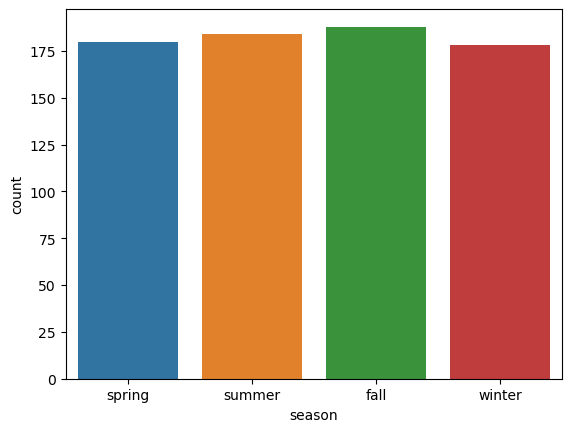

Countplot of yr


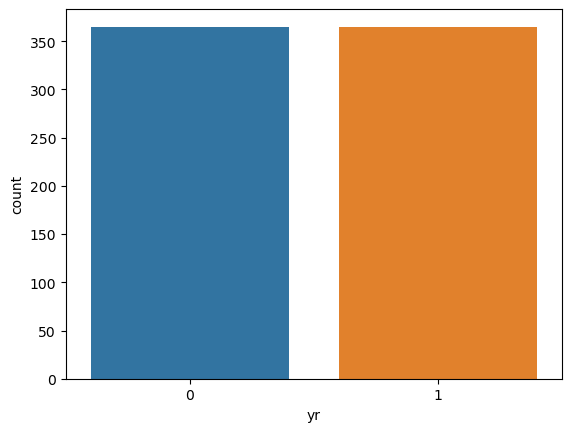

Countplot of mnth


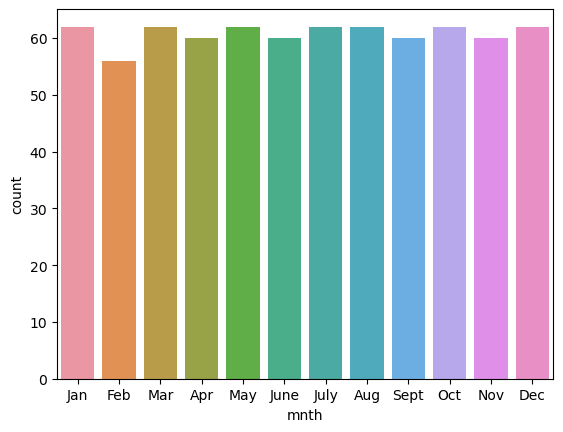

Countplot of holiday


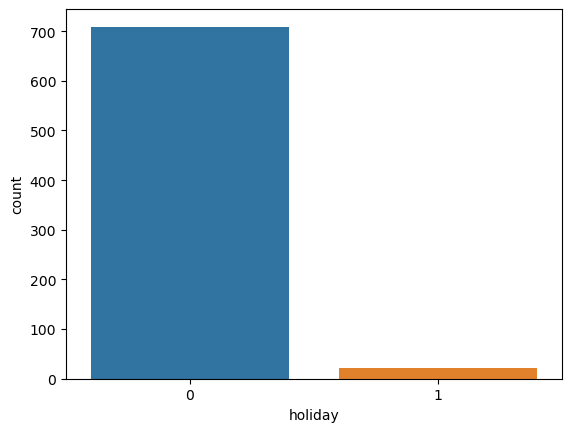

Countplot of weekday


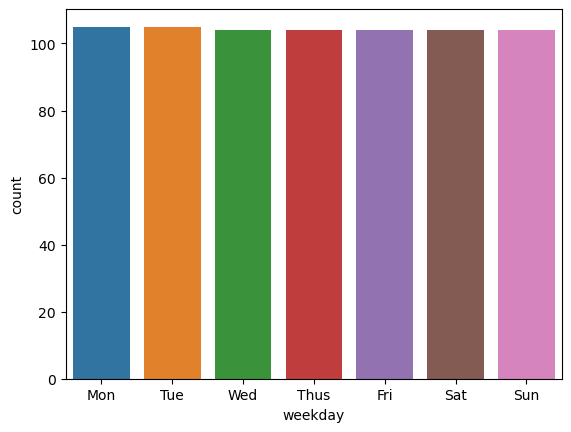

Countplot of workingday


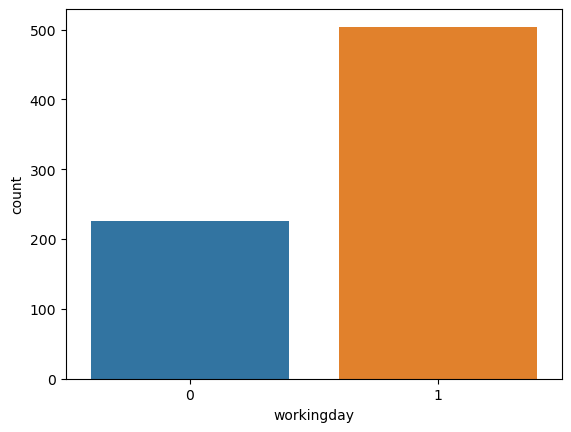

Countplot of weathersit


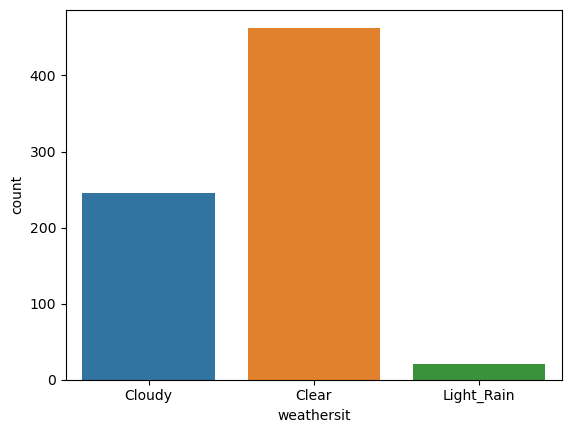

In [18]:
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(bikes_df[i])
    plt.show()

<b>Some Observations</b> :

- Holidays have less entries, but that does not give much insights coz duh <br>
- Even though the working day are many compared to non-working day (by common sense) still we can see that the day row entries of workingday are seems to be double of the ones from non-working day. <br>
- Clear weather has the highest day entries than Cloudy and Light Rain <br>

As <b>"cnt"</b> is the Target Variable, our aim would be better understanding data accordingly.

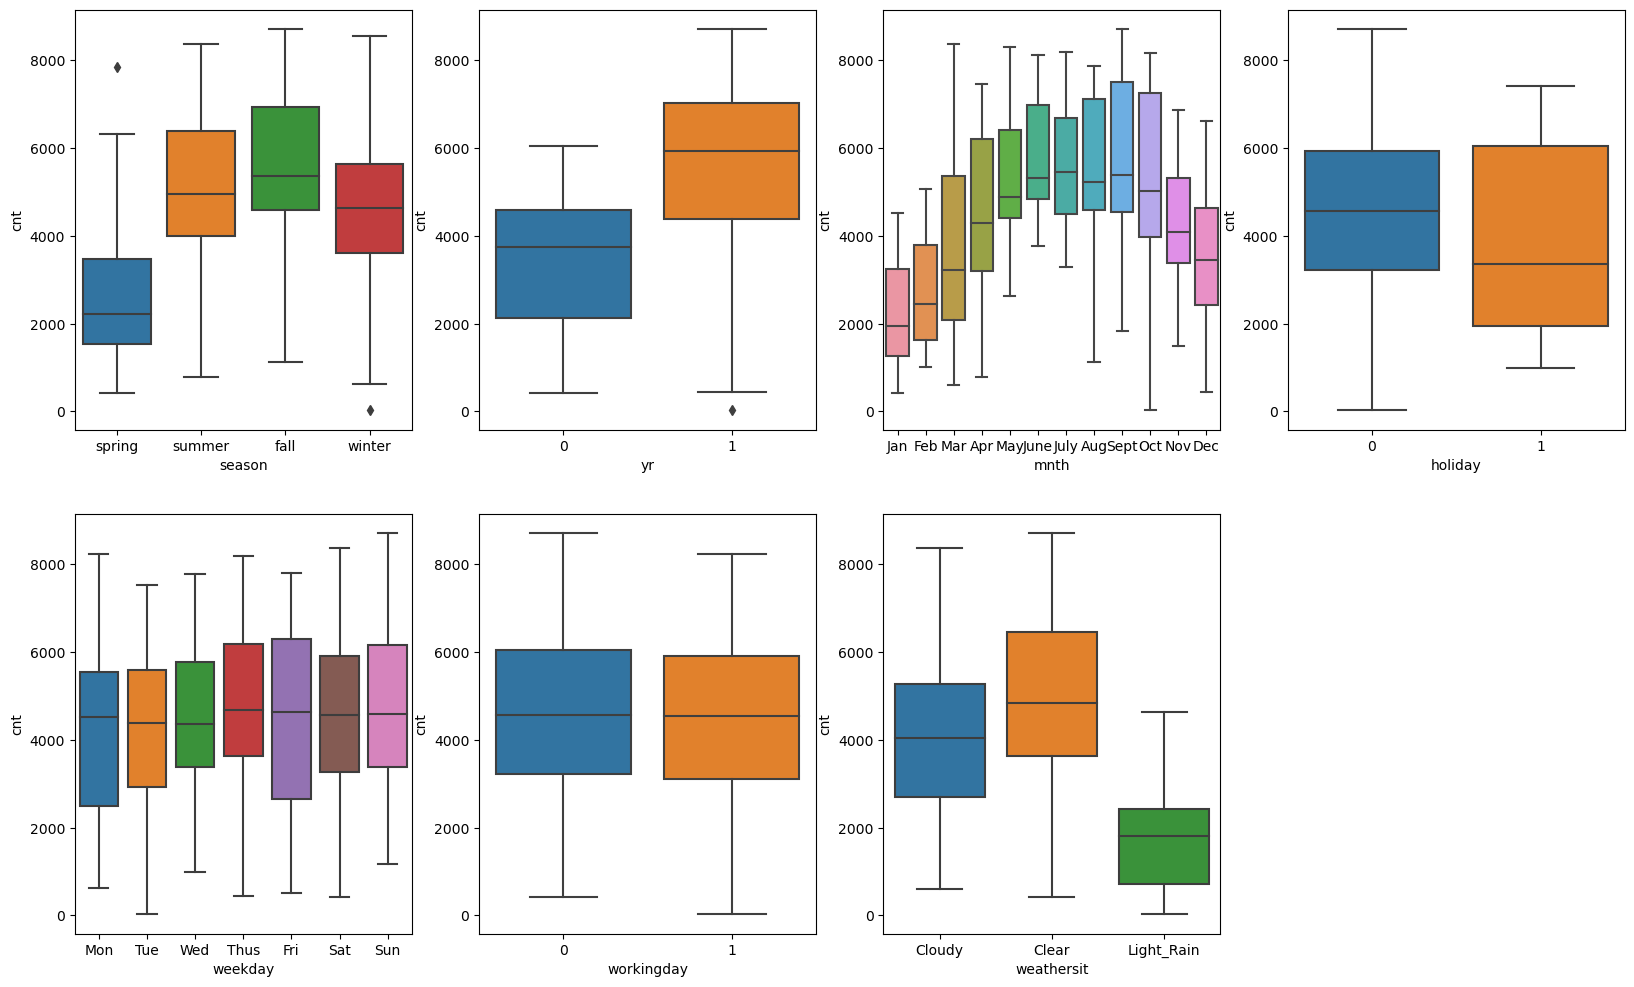

In [19]:
plt.figure(figsize=(20, 12))

for i, j in enumerate(cat_cols):
    plt.subplot(2,4, i+1)
    sns.boxplot(x = j, y = 'cnt', data = bikes_df)

plt.show()    


<b>Observations</b>:
<br>- March to Oct month seems to have more cnt of rides
<br>- Spring have less count
<br>- Year 2019 have more entries than 2018, So it seems there is upward trend yearwise.
<br>- There are very few rides where there is Rainy situation

Lets see <b>continious</b> columns in boxplots

Boxplot of temp


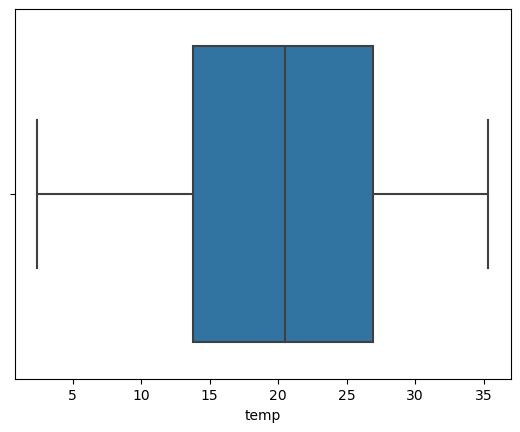

Boxplot of atemp


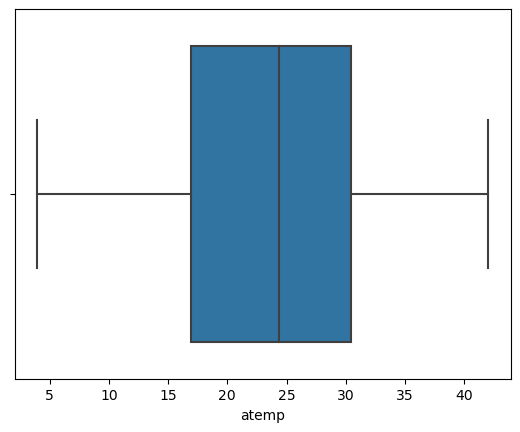

Boxplot of hum


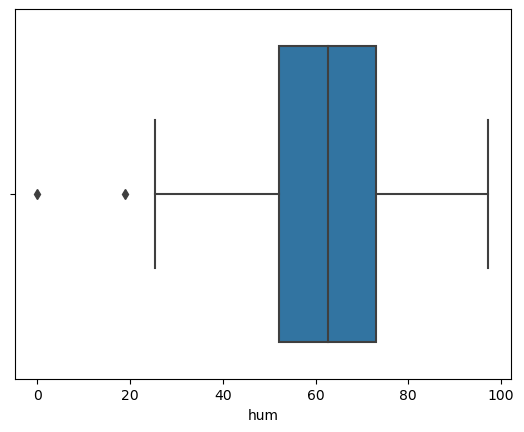

Boxplot of windspeed


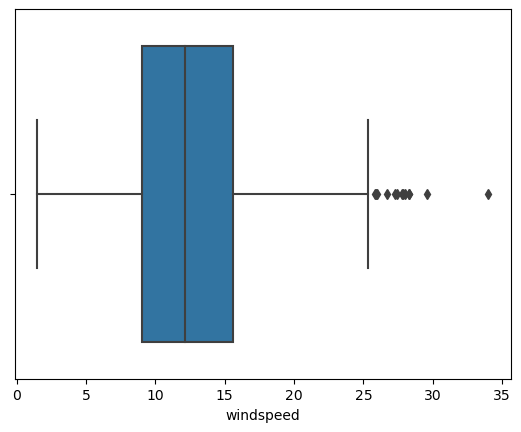

Boxplot of cnt


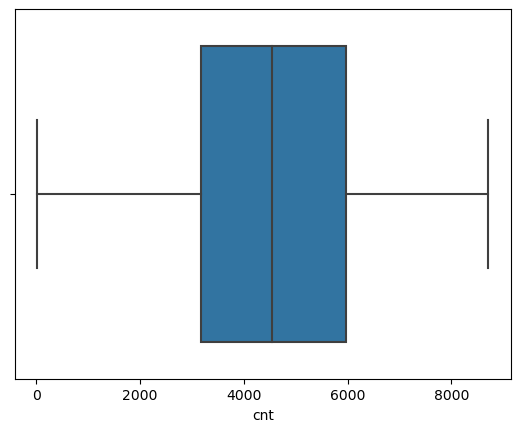

In [20]:
for i in cont_cols:
    print("Boxplot of",i)
    sns.boxplot(bikes_df[i])
    plt.show()

From these box plots, we can see there are not many outliers to be handled. We will handle those if those feature requires ahead.

Lets visualize continious columns to find any visible patterns

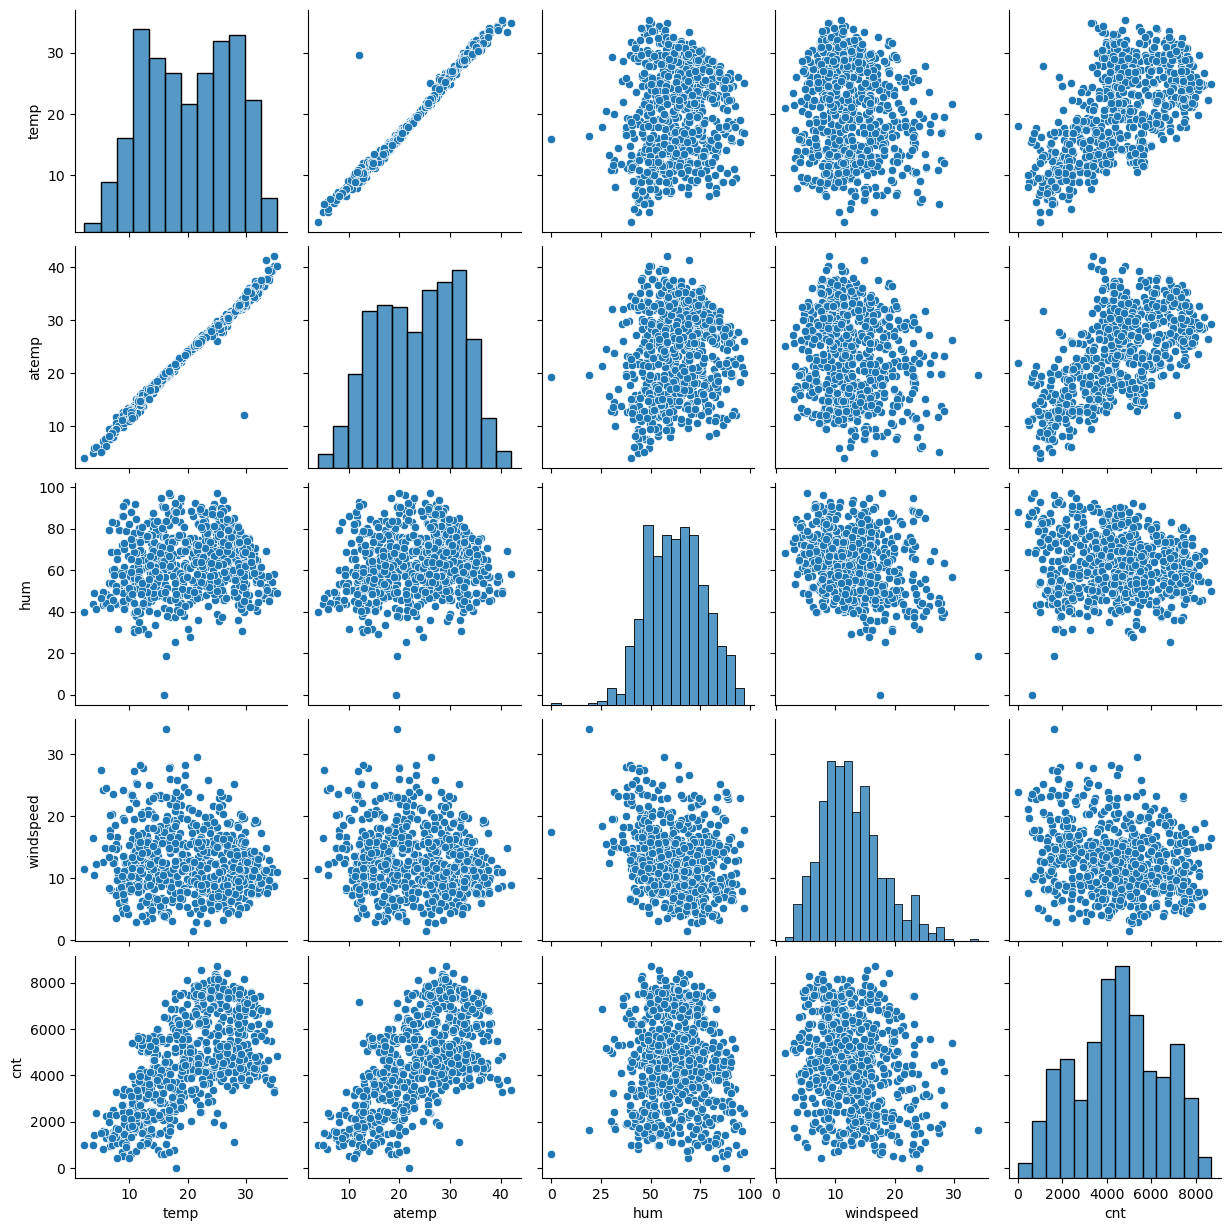

In [21]:
sns.pairplot(data=bikes_df,vars=cont_cols)
plt.show()

<b>Observations</b>:
<br> - atemp and temp have strong relationship with each other. That is a very good insight as this is the example of <b>"Multicollinearity"</b> (When time comes we should be only using either of variables instead of both)

<br> - From pattern we can see some visible linear pattern of column <b>Cnt</b> with "temp" and "atemp", others are scattered.
<br><br> Lets move to next points to get more insights.

Lets try to find correlation between various columns, to check for insigts

##### Lets see <b>correlations</b> of overall columns

In [22]:
bikes_df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


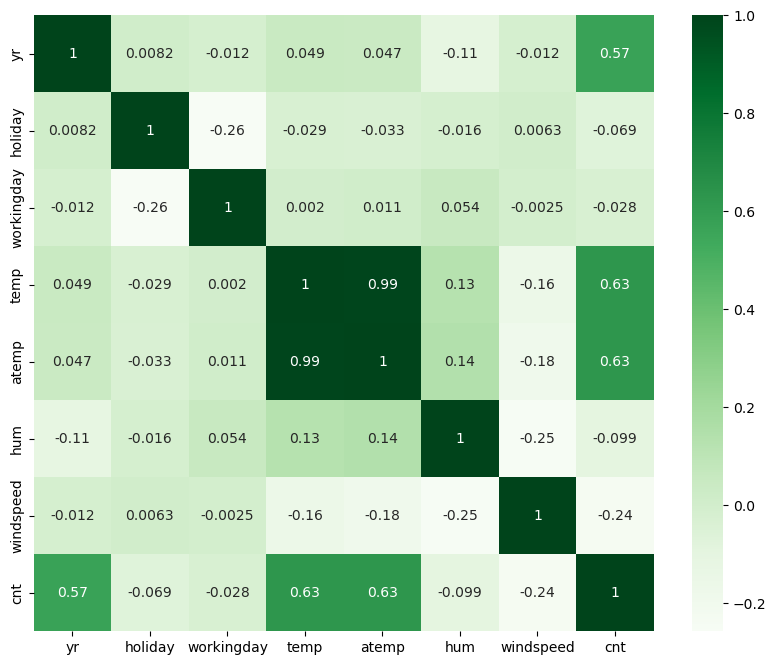

In [23]:
plt.figure(figsize = (10, 8))
sns.heatmap(bikes_df.corr(), annot = True, cmap="Greens")
plt.show()

<b>Observation</b>:<br>
'yr' , 'temp' , 'atemp' has a good correlation with 'cnt' variable

## Step 4: Data Preparation For Modelling

### Creating Dummy Variables

For regression we would need numerical values instead of categorical ones. So lets create dummy variables for this.

In [24]:
cat_vars = bikes_df[['season','mnth','weekday','weathersit']]

dummy_vars = pd.get_dummies(cat_vars,drop_first=True)
bikes_df = pd.concat([bikes_df,dummy_vars],axis=1)

bikes_df.drop(cat_vars,axis =1 , inplace=True)

bikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
bikes_df.shape

(730, 30)

We have 30 columns.

###  Splitting the Data into Train and Test

In [26]:
# Considering 70:30 ratio
np.random.seed(0)
bikes_df_train, bikes_df_test = train_test_split(bikes_df, train_size = 0.7, random_state = 100)

In [27]:
print(bikes_df_train.shape)
print(bikes_df_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features of Train and Test dataset

In [28]:
# Lets scale following numeric variables
scaling_vars = ['temp','atemp','hum','windspeed','cnt']
bikes_df[scaling_vars].head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
scaler = MinMaxScaler()

Lets apply Scaling on Train Data

In [30]:
bikes_df_train[scaling_vars] = scaler.fit_transform(bikes_df_train[scaling_vars])

In [31]:
# checking if all the variables has a min value 0 and max value 1 
bikes_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


our little operation was success, all value seems in 0 and 1 range

Now that we have breaked categorical columns into more columns, Lets see the correlation of variables

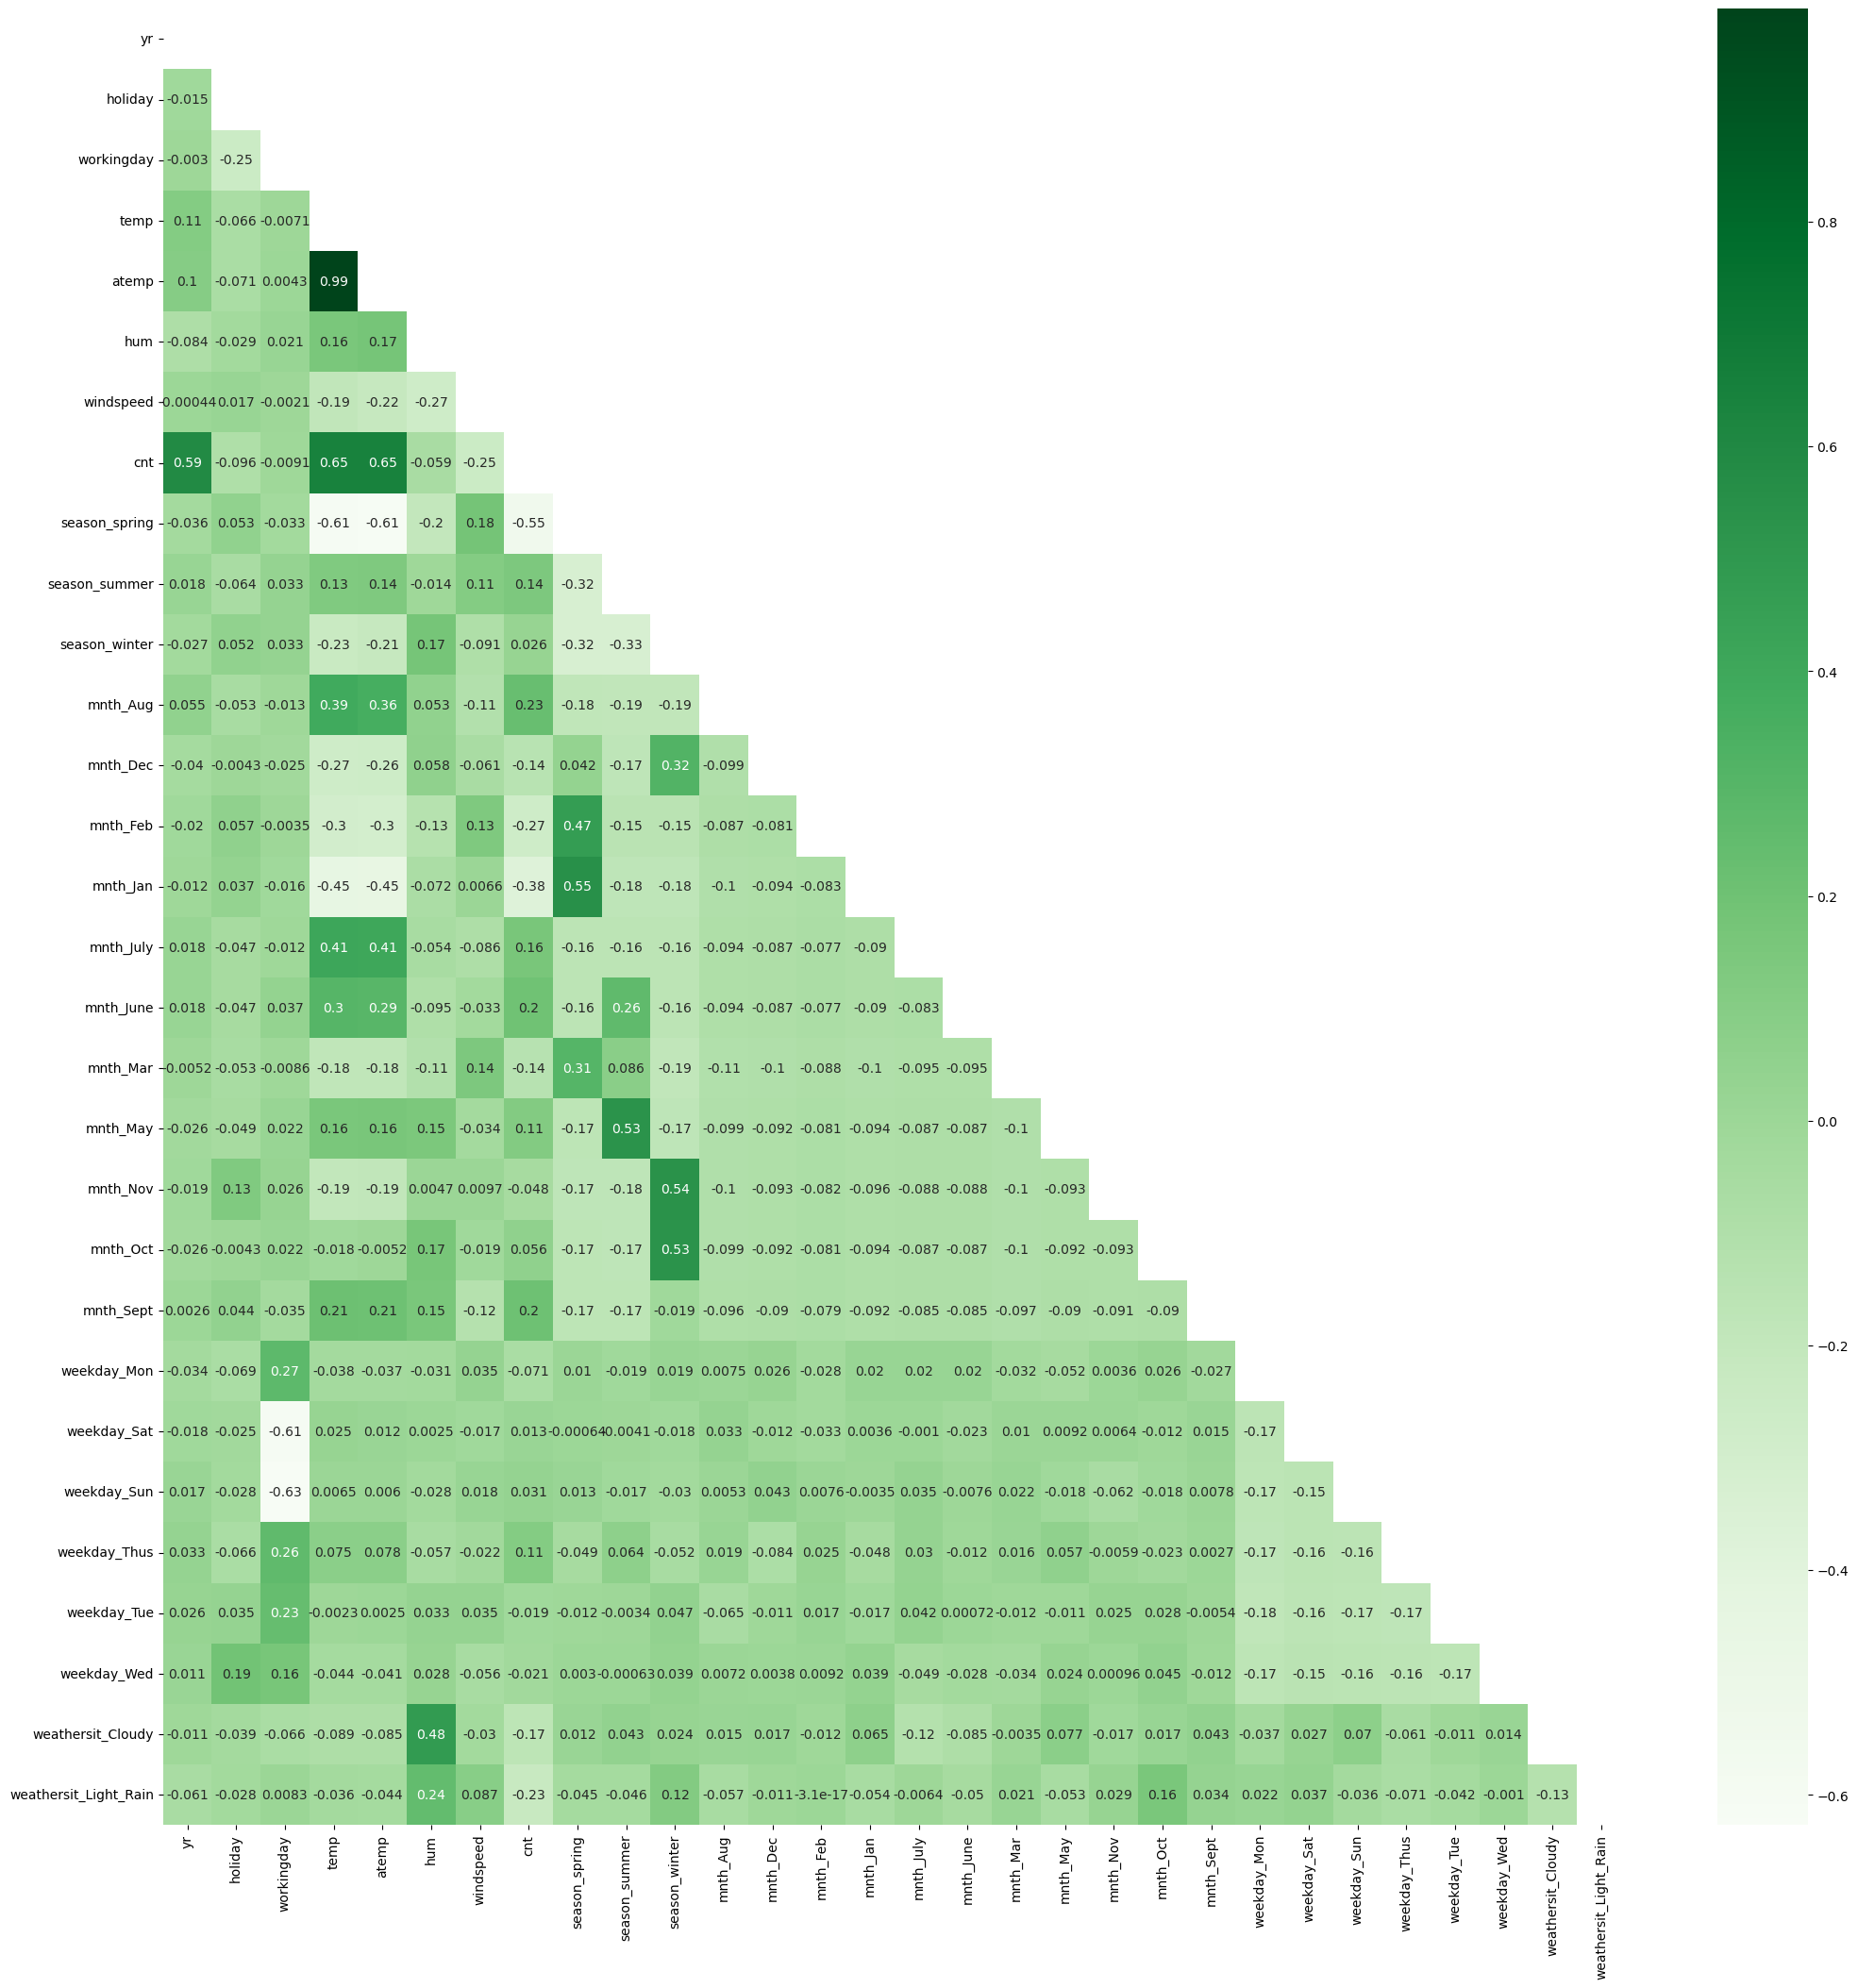

In [32]:
plt.figure(figsize = (25,25))
matrix = np.triu(bikes_df_train.corr())
sns.heatmap(bikes_df_train.corr(), annot = True, cmap="Greens", mask=matrix)
plt.show()

As seen before there is relation with temp, lets visualize the scatter plot again

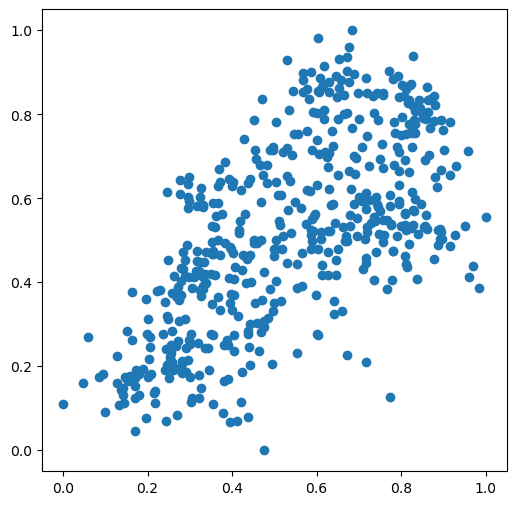

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(bikes_df_train.temp, bikes_df_train.cnt)
plt.show()

As the plot shows visible pattern, lets build model on it

### Dividing trainset into X and y sets

In [34]:
y_train = bikes_df_train.pop('cnt') 
X_train = bikes_df_train

In [35]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Step 5: Model Building

### Implement RFE(Recursive feature elimination) to eliminate few features

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thus', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_Rain', True, 1)]

We have cutoff of 15 variables to RFE and we can see above list of remaining variables

#### Now lets take it forward with Manual approach

In [39]:
X_train_ref = X_train.columns[rfe.support_]
X_train = X_train[X_train_ref]
X_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sept', 'weathersit_Cloudy', 'weathersit_Light_Rain'],
      dtype='object')

In [40]:
X_train.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sept,weathersit_Cloudy,weathersit_Light_Rain
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


Before we start building models, lets create a function to calculate VIF

In [41]:

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model Iteration 1

In [42]:
# Adding a constant 
X_train_lm = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train_lm).fit()
model_1.params

const                    0.319667
yr                       0.230404
holiday                 -0.091089
temp                     0.481503
hum                     -0.162213
windspeed               -0.188726
season_spring           -0.061255
season_summer            0.042337
season_winter            0.101921
mnth_Dec                -0.035461
mnth_Jan                -0.043411
mnth_July               -0.055250
mnth_Nov                -0.038701
mnth_Sept                0.075467
weathersit_Cloudy       -0.054300
weathersit_Light_Rain   -0.246481
dtype: float64

In [43]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          8.15e-189
Time:                        00:34:12   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3197      0.036      8.859      0.000       0.249       0.391
yr                        0.2304      0.008     28.487      0.000       0.215       0.246
holiday                  -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                      0.4815      0.037     13.005      0.000       0.409       0.554
hum                      -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer             0.0423      0.015      2.761      0.006       0.012       0.072
season_winter             0.1019      0.018      5.656      0.000       0.067       0.137
mnth_Dec                 -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                 -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                 -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sept                 0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
weathersit_Light_Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
calculate_VIF(X_train)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_Cloudy,2.32
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


#### In Model 1 Observations:
- We have R-squared and Adj R-squared are good 
- But VIF of variable 'hum' is high
- So we can remove 'hum' variable 

In [45]:
# Removing 'hum' from the dataset
X_train = X_train.drop('hum',axis =1)

### Model 2

Checking summary and VIF values after removing 'hum' variable

In [46]:
X_train_lm = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_train_lm).fit()
model_2.params

const                    0.245029
yr                       0.234455
holiday                 -0.091776
temp                     0.438717
windspeed               -0.158482
season_spring           -0.071257
season_summer            0.034890
season_winter            0.086883
mnth_Dec                -0.042806
mnth_Jan                -0.050008
mnth_July               -0.050046
mnth_Nov                -0.039513
mnth_Sept                0.068730
weathersit_Cloudy       -0.080073
weathersit_Light_Rain   -0.291749
dtype: float64

In [47]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          4.75e-186
Time:                        00:34:12   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2450      0.032      7.618      0.000       0.182       0.308
yr                        0.2345      0.008     28.687      0.000       0.218       0.251
holiday                  -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                      0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_summer             0.0349      0.015      2.251      0.025       0.004       0.065
season_winter             0.0869      0.018      4.831      0.000       0.052       0.122
mnth_Dec                 -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_Jan                 -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July                -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_Nov                 -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_Sept                 0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_Cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
weathersit_Light_Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
calculate_VIF(X_train)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_July,1.59
12,weathersit_Cloudy,1.57


#### In Model 2 Observations:
- After removing 'hum' variable the VIF values of other variables too.
- We have R-square and Adjusted R-square have good value.
- But the p-value of 'season_summer' is higher than others.
- So we can remove 'season_summer' variable.

In [49]:
X_train = X_train.drop('season_summer',axis =1)

- We will now have 13 variables

### Model 3

Checking summary and VIF values after removing 'season_summer' variable

In [50]:
X_train_lm = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_train_lm).fit()
model_3.params

const                    0.289853
yr                       0.235037
holiday                 -0.091109
temp                     0.401861
windspeed               -0.153654
season_spring           -0.104597
season_winter            0.062055
mnth_Dec                -0.049628
mnth_Jan                -0.055649
mnth_July               -0.064719
mnth_Nov                -0.046895
mnth_Sept                0.053425
weathersit_Cloudy       -0.079765
weathersit_Light_Rain   -0.293851
dtype: float64

In [51]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          4.08e-186
Time:                        00:34:13   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2899      0.025     11.426      0.000       0.240       0.340
yr                        0.2350      0.008     28.656      0.000       0.219       0.251
holiday                  -0.0911      0.026     -3.483      0.001      -0.143      -0.040
temp                      0.4019      0.033     12.363      0.000       0.338       0.466
windspeed                -0.1537      0.025     -6.082      0.000      -0.203      -0.104
season_spring            -0.1046      0.016     -6.684      0.000      -0.135      -0.074
season_winter             0.0621      0.014      4.351      0.000       0.034       0.090
mnth_Dec                 -0.0496      0.018     -2.828      0.005      -0.084      -0.015
mnth_Jan                 -0.0556      0.018     -3.042      0.002      -0.092      -0.020
mnth_July                -0.0647      0.017     -3.720      0.000      -0.099      -0.031
mnth_Nov                 -0.0469      0.019     -2.476      0.014      -0.084      -0.010
mnth_Sept                 0.0534      0.016      3.387      0.001       0.022       0.084
weathersit_Cloudy        -0.0798      0.009     -9.126      0.000      -0.097      -0.063
weathersit_Light_Rain    -0.2939      0.025    -11.885      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       69.994   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.054
Skew:                          -0.690   Prob(JB):                     2.93e-40
Kurtosis:                       5.582   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
calculate_VIF(X_train)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.55
4,season_spring,2.36
0,yr,2.06
9,mnth_Nov,1.81
7,mnth_Jan,1.65
11,weathersit_Cloudy,1.54
6,mnth_Dec,1.46
8,mnth_July,1.36


p-value of mnth_Nov is higher than other, lets thin the herd

In [53]:
X_train = X_train.drop('mnth_Nov',axis =1)

- We will now have 12 variables

### Model 4

Checking summary and VIF values after removing 'mnth_Nov' variable

In [54]:
X_train_lm = sm.add_constant(X_train)
model_4 = sm.OLS(y_train, X_train_lm).fit()
model_4.params

const                    0.277970
yr                       0.234929
holiday                 -0.098827
temp                     0.418493
windspeed               -0.153806
season_spring           -0.101137
season_winter            0.045735
mnth_Dec                -0.033164
mnth_Jan                -0.050767
mnth_July               -0.067335
mnth_Sept                0.057168
weathersit_Cloudy       -0.078779
weathersit_Light_Rain   -0.289461
dtype: float64

In [55]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          5.72e-186
Time:                        00:34:13   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2780      0.025     11.102      0.000       0.229       0.327
yr                        0.2349      0.008     28.496      0.000       0.219       0.251
holiday                  -0.0988      0.026     -3.785      0.000      -0.150      -0.048
temp                      0.4185      0.032     13.091      0.000       0.356       0.481
windspeed                -0.1538      0.025     -6.057      0.000      -0.204      -0.104
season_spring            -0.1011      0.016     -6.455      0.000      -0.132      -0.070
season_winter             0.0457      0.013      3.597      0.000       0.021       0.071
mnth_Dec                 -0.0332      0.016     -2.032      0.043      -0.065      -0.001
mnth_Jan                 -0.0508      0.018     -2.777      0.006      -0.087      -0.015
mnth_July                -0.0673      0.017     -3.857      0.000      -0.102      -0.033
mnth_Sept                 0.0572      0.016      3.622      0.000       0.026       0.088
weathersit_Cloudy        -0.0788      0.009     -8.977      0.000      -0.096      -0.062
weathersit_Light_Rain    -0.2895      0.025    -11.678      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       62.396   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.665
Skew:                          -0.640   Prob(JB):                     1.92e-33
Kurtosis:                       5.335   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
calculate_VIF(X_train)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,season_spring,2.36
0,yr,2.06
5,season_winter,1.64
7,mnth_Jan,1.64
10,weathersit_Cloudy,1.54
8,mnth_July,1.36
6,mnth_Dec,1.29
9,mnth_Sept,1.20


Lets remove "mnth_Dec" due to p-value

In [57]:
X_train = X_train.drop('mnth_Dec',axis =1)

### Model 5

Checking summary and VIF values after removing 'mnth_Dec' variable

In [58]:
X_train_lm = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_train_lm).fit()
model_5.params

const                    0.267075
yr                       0.234997
holiday                 -0.097178
temp                     0.431624
windspeed               -0.148026
season_spring           -0.102728
season_winter            0.040806
mnth_Jan                -0.043102
mnth_July               -0.069439
mnth_Sept                0.058276
weathersit_Cloudy       -0.078687
weathersit_Light_Rain   -0.286749
dtype: float64

In [59]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          2.87e-186
Time:                        00:34:13   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2671      0.025     10.886      0.000       0.219       0.315
yr                        0.2350      0.008     28.415      0.000       0.219       0.251
holiday                  -0.0972      0.026     -3.712      0.000      -0.149      -0.046
temp                      0.4316      0.031     13.743      0.000       0.370       0.493
windspeed                -0.1480      0.025     -5.848      0.000      -0.198      -0.098
season_spring            -0.1027      0.016     -6.545      0.000      -0.134      -0.072
season_winter             0.0408      0.013      3.259      0.001       0.016       0.065
mnth_Jan                 -0.0431      0.018     -2.402      0.017      -0.078      -0.008
mnth_July                -0.0694      0.017     -3.972      0.000      -0.104      -0.035
mnth_Sept                 0.0583      0.016      3.683      0.000       0.027       0.089
weathersit_Cloudy        -0.0787      0.009     -8.938      0.000      -0.096      -0.061
weathersit_Light_Rain    -0.2867      0.025    -11.549      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       58.688   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.828
Skew:                          -0.612   Prob(JB):                     1.18e-30
Kurtosis:                       5.233   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
calculate_VIF(X_train)

,Features,VIF
2,temp,4.63
3,windspeed,4.01
4,season_spring,2.24
0,yr,2.06
6,mnth_Jan,1.60
9,weathersit_Cloudy,1.53
5,season_winter,1.39
7,mnth_July,1.36
8,mnth_Sept,1.20
10,weathersit_Light_Rain,1.08


Lets remove "mnth_Jan" due to higher p-value

In [61]:
X_train = X_train.drop('mnth_Jan',axis =1)

### Model 6

Checking summary and VIF values after removing 'mnth_Jan' variable

In [62]:
X_train_lm = sm.add_constant(X_train)
model_6 = sm.OLS(y_train, X_train_lm).fit()
model_6.params

const                    0.253133
yr                       0.234244
holiday                 -0.098014
temp                     0.449789
windspeed               -0.139510
season_spring           -0.112286
season_winter            0.044893
mnth_July               -0.072935
mnth_Sept                0.057311
weathersit_Cloudy       -0.079650
weathersit_Light_Rain   -0.285463
dtype: float64

In [63]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          3.10e-186
Time:                        00:34:13   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2531      0.024     10.569      0.000       0.206       0.300
yr                        0.2342      0.008     28.210      0.000       0.218       0.251
holiday                  -0.0980      0.026     -3.727      0.000      -0.150      -0.046
temp                      0.4498      0.031     14.686      0.000       0.390       0.510
windspeed                -0.1395      0.025     -5.540      0.000      -0.189      -0.090
season_spring            -0.1123      0.015     -7.360      0.000      -0.142      -0.082
season_winter             0.0449      0.012      3.602      0.000       0.020       0.069
mnth_July                -0.0729      0.018     -4.167      0.000      -0.107      -0.039
mnth_Sept                 0.0573      0.016      3.606      0.000       0.026       0.089
weathersit_Cloudy        -0.0796      0.009     -9.014      0.000      -0.097      -0.062
weathersit_Light_Rain    -0.2855      0.025    -11.445      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.692
Skew:                          -0.599   Prob(JB):                     2.08e-30
Kurtosis:                       5.235   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
calculate_VIF(X_train)

,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.64
8,weathersit_Cloudy,1.52
5,season_winter,1.39
6,mnth_July,1.35
7,mnth_Sept,1.20
9,weathersit_Light_Rain,1.08
1,holiday,1.04


#### Final Model Iteration Observation

<br> - Above model-6 shows p-values 0 and VIF all under 5
<br> - R-square=0.832 and Adj R-square=0.829, both are good
<br> - <b>From above stats we can say all variables are highly significant, so lets make this model iteration as last and move to next stage<b>

In [65]:
model_final=model_6

## Residual Analysis of the Train data

Lets analyse the error terms, which is difference between the actual Y values and the ones predicted

In [66]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          3.10e-186
Time:                        00:34:13   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2531      0.024     10.569      0.000       0.206       0.300
yr                        0.2342      0.008     28.210      0.000       0.218       0.251
holiday                  -0.0980      0.026     -3.727      0.000      -0.150      -0.046
temp                      0.4498      0.031     14.686      0.000       0.390       0.510
windspeed                -0.1395      0.025     -5.540      0.000      -0.189      -0.090
season_spring            -0.1123      0.015     -7.360      0.000      -0.142      -0.082
season_winter             0.0449      0.012      3.602      0.000       0.020       0.069
mnth_July                -0.0729      0.018     -4.167      0.000      -0.107      -0.039
mnth_Sept                 0.0573      0.016      3.606      0.000       0.026       0.089
weathersit_Cloudy        -0.0796      0.009     -9.014      0.000      -0.097      -0.062
weathersit_Light_Rain    -0.2855      0.025    -11.445      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.692
Skew:                          -0.599   Prob(JB):                     2.08e-30
Kurtosis:                       5.235   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
y_train_pred = model_final.predict(X_train_lm)

<AxesSubplot:title={'center':'Residual Analysis'}, xlabel='Error terms', ylabel='Density'>

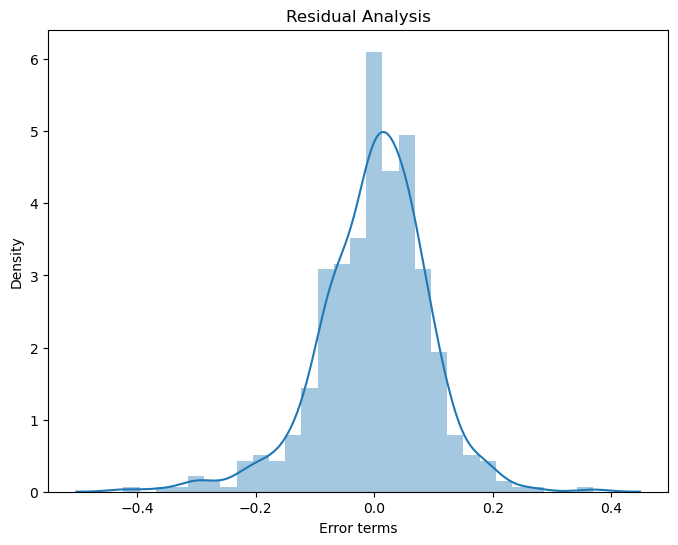

In [68]:
fig = plt.figure(figsize=[8, 6])
residual = y_train - y_train_pred
plt.title('Residual Analysis')
plt.xlabel('Error terms')
sns.distplot(residual)

<b>Observation:</b>Errors are normally distribured and the mean value is around 0. 

### Homoscedasticity

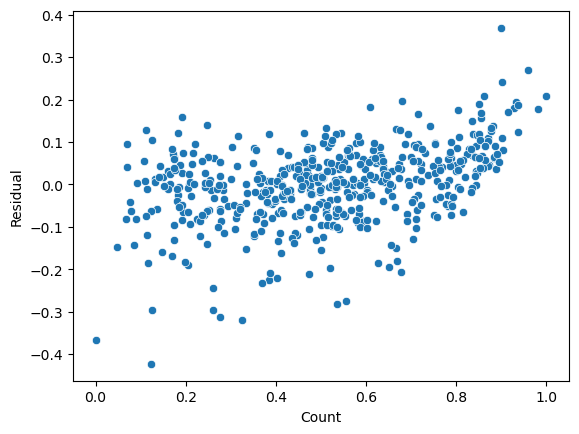

In [69]:
sns.scatterplot(y_train, residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<b>Observation</b>: As seen in above plot, the scatter point do not show that much of a pattern

## Step 7: Making Predictions on Test data

lets scale test data

In [70]:
bikes_df_test[scaling_vars] = scaler.transform(bikes_df_test[scaling_vars])
bikes_df_test.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0


In [71]:
bikes_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [72]:
y_test = bikes_df_test.pop('cnt')
X_test = bikes_df_test

In [73]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thus,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

#### Predicting the Test Data

following are the variables we finalized from above model iterations

In [5]:
vars = ['yr','holiday','temp','windspeed','season_spring','season_winter','mnth_July','mnth_Sept', 'weathersit_Cloudy','weathersit_Light_Rain']

In [76]:
X_test = X_test[vars]
X_test = sm.add_constant(X_test)
y_test_pred = model_6.predict(X_test)
y_test_pred.head(2)

184    0.364913
535    0.871350
dtype: float64

#### Residual Analysis of the Test data

<AxesSubplot:title={'center':'Residual Analysis'}, xlabel='Error terms', ylabel='Density'>

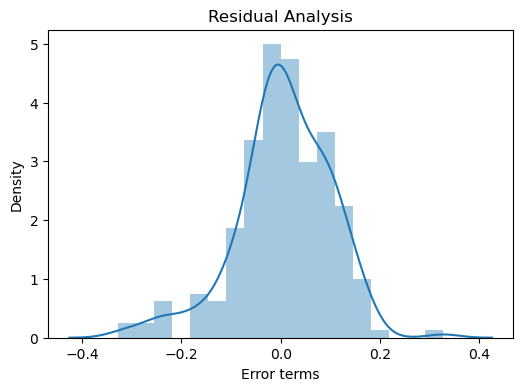

In [77]:
fig = plt.figure(figsize=[6,4])
residual = y_test - y_test_pred
plt.title('Residual Analysis')
plt.xlabel('Error terms')
sns.distplot(residual)

<b>Observation:</b> Errors are normally distribured and the mean value is around 0. 

## Step 8 : Model Evaluation

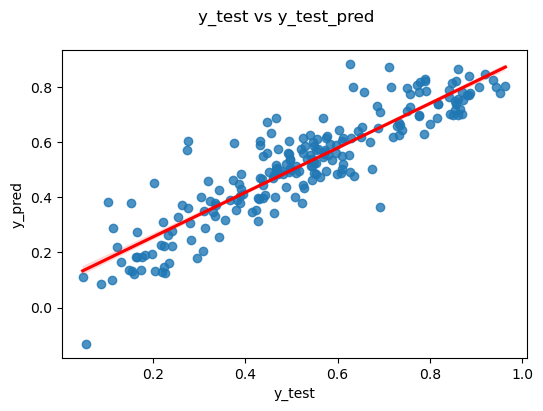

In [78]:
# Plotting y_test and y_test_pred 

fig = plt.figure(figsize=[6,4])
#plt.scatter(y_test, y_test_pred)
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred')

plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

<b>Observation</b>:Linearity can be observed from above model clearly

### R-squared value for Test 

In [79]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8074869048294193

In [80]:
X_test.shape

(220, 11)

### Adj R-squared value for Test 

In [81]:
# R-squared value for Test data 
r2 = 0.8074869048294193
# 'n' is the number of rows in X_test
n = 220
# 'p' is the number of features/predictors (p) in X_test
p = 11
# Finding Adjusted R-squared using the formula
Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
Adj_r2

0.7973059238348212

**Finally we have values of:**

- Train R-squared : 0.832
- Train Adj R-squared : 0.829
- Test R-squared : 0.807
- Test Adj R-squared : 0.797

### Conclusion:

From above model we can see that below points have significant impact on bike sharing:<br>
yr, holiday, temp, windspeed, spring & winter season, July & September Month, Cloudy & Light_Rain weather condition